# Dataset
Generate dataset with known probability density of relation structure

In [1]:
import numpy as np

In [2]:
#number of coordinates
n=100

musics= ['rock','pop','hiphop','country','electronic','jazz','blue']
# persons = ['Alice','Bob','Charlie','David','Eve','Frank','Greg','Hans','Ian','Jack','Kara','Lucy','Maria','Nico','Olivia','Peter','Q','Ryan','Sarah','Taylor','Umar','Vanessa','Winston','Xena','Yanick','Zain']
hobbies = ['learning','cooking','dance','game','woodworking','writing','painting','gardening']
pets = ['cat','dog','rabbit','bird','hamster','fish','turtle']

print('generating random dataset from kernel density')
a=np.array([len(musics),len(hobbies),len(pets)])
print('\nsize:\n|music|,|hobby|,|pet|:',a)


#generate random triple from kernel density, 3D normal distribution
#we may apply transformation here, but i keep it simple for now
b=np.random.normal(0,1,size=[int(n*.5),len(a)])
#scale
c=np.einsum('j,ij->ij', a*0.1, b)
#translate to 0.5a
d=np.append(c+0.7*a,c+0.2*a,axis=0)
#clip the position in valid range
e=np.clip(np.round(d),[0,0,0],a-1).astype(int)

print('\nexample:\n'+ str(e[:10]))
print('shape:'+str(e.shape))

generating random dataset from kernel density

size:
|music|,|hobby|,|pet|: [7 8 7]

example:
[[4 6 5]
 [5 7 6]
 [5 7 4]
 [5 5 6]
 [5 5 5]
 [6 6 5]
 [5 5 5]
 [4 6 3]
 [4 4 5]
 [6 7 4]]
shape:(100, 3)


In [3]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# generate some points of a 3D Gaussian
# points = np.random.normal(size=(3, 50))
points = d.T
# do kernel density estimation to get smooth estimate of distribution
# make grid of points
x, y, z = np.mgrid[0:a[0]:100j, 0:a[1]:100j, 0:a[2]:100j]
kernel = sp.stats.gaussian_kde(points)
positions = np.vstack((x.ravel(), y.ravel(), z.ravel()))
density = np.reshape(kernel(positions).T, x.shape)

<Figure size 800x800 with 0 Axes>

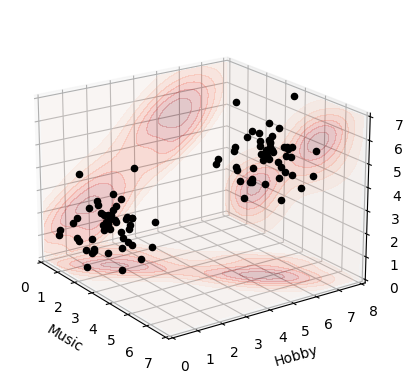

In [4]:
# plot points
plt.figure(figsize=(8, 8))
ax = plt.figure().add_subplot(projection='3d')

# plot projection of density onto z-axis
plotdat = np.sum(density, axis=2)
plotdat = plotdat / np.max(plotdat)
plotx, ploty = np.mgrid[0:a[0]:100j, 0:a[1]:100j]
ax.contourf(plotx, ploty, plotdat, offset=0, zdir='z', alpha=0.2, cmap='Reds')

#This is new
#plot projection of density onto y-axis
plotdat = np.sum(density, axis=1) #summing up density along y-axis
plotdat = plotdat / np.max(plotdat)
plotx, plotz = np.mgrid[0:a[0]:100j, 0:a[2]:100j]
ax.contourf(plotx, plotdat, plotz, offset=a[1], zdir='y', alpha=0.2, cmap='Reds')

#plot projection of density onto x-axis
plotdat = np.sum(density, axis=0) #summing up density along z-axis
plotdat = plotdat / np.max(plotdat)
ploty, plotz = np.mgrid[0:a[1]:100j, 0:a[2]:100j]
ax.contourf(plotdat, ploty, plotz, offset=0, zdir='x', alpha=0.2, cmap='Reds')

ax.scatter(xs=points[0,:], ys=points[1,:], zs=points[2,:], 
           marker='o', c='k',depthshade=0,label='triple coordinates')

ax.set(xlim=(0, a[0]), ylim=(0, a[1]), zlim=(0, a[2]),
       xlabel='Music', ylabel='Hobby', zlabel='Pet')
# ax.legend()
ax.view_init(elev=20., azim=-35, roll=0)
# plt.show()

In [5]:
subjects=[]
predicates=[]
objects=[]
for i,coor in enumerate(e):
    print(f'{i}{coor}')
    
    s=f's{i:02d}'
    p='like_music'
    o=f'{musics[coor[0]]}'
    print(f'    ({s},{p}->{o})')
    subjects.append(s)
    predicates.append(p)
    objects.append(o)
    
    p='has_hobby'
    o=f'{hobbies[coor[1]]}'
    print(f'    ({s},{p}->{o})')
    subjects.append(s)
    predicates.append(p)
    objects.append(o)
    
    p='has_pet'
    o=f'{pets[coor[2]]}'
    print(f'    ({s},{p}->{o})')
    subjects.append(s)
    predicates.append(p)
    objects.append(o)
    
#     print(f'        {music[coor[0]]:>6}, has_hobby->{hobbies[coor[1]]:<8}')
#     subjects.append(music[coor[0]])
#     predicates.append('has_hobby')
#     objects.append(hobbies[coor[1]])
                           
#     print(f'        {music[coor[0]]:>6}, has_pet->  {pets[coor[2]]:<8}')
#     subjects.append(music[coor[0]])
#     predicates.append('has_pet')
#     objects.append(pets[coor[2]])

0[4 6 5]
    (s00,like_music->electronic)
    (s00,has_hobby->painting)
    (s00,has_pet->fish)
1[5 7 6]
    (s01,like_music->jazz)
    (s01,has_hobby->gardening)
    (s01,has_pet->turtle)
2[5 7 4]
    (s02,like_music->jazz)
    (s02,has_hobby->gardening)
    (s02,has_pet->hamster)
3[5 5 6]
    (s03,like_music->jazz)
    (s03,has_hobby->writing)
    (s03,has_pet->turtle)
4[5 5 5]
    (s04,like_music->jazz)
    (s04,has_hobby->writing)
    (s04,has_pet->fish)
5[6 6 5]
    (s05,like_music->blue)
    (s05,has_hobby->painting)
    (s05,has_pet->fish)
6[5 5 5]
    (s06,like_music->jazz)
    (s06,has_hobby->writing)
    (s06,has_pet->fish)
7[4 6 3]
    (s07,like_music->electronic)
    (s07,has_hobby->painting)
    (s07,has_pet->bird)
8[4 4 5]
    (s08,like_music->electronic)
    (s08,has_hobby->woodworking)
    (s08,has_pet->fish)
9[6 7 4]
    (s09,like_music->blue)
    (s09,has_hobby->gardening)
    (s09,has_pet->hamster)
10[5 5 6]
    (s10,like_music->jazz)
    (s10,has_hobby->writing)
   

In [6]:
import pandas as pd
# Create a dataframe
df = pd.DataFrame({'subject': subjects, 'predicate': predicates, 'object': objects})

df=df.drop_duplicates()
df=df.sort_values(by=['subject', 'predicate'])
df

# Save the dataframe to a TSV file
# df.to_csv(f'dataset2kd{n}.csv', sep=',', index=False, header=False)

,subject,predicate,object
1,s00,has_hobby,painting
2,s00,has_pet,fish
0,s00,like_music,electronic
4,s01,has_hobby,gardening
5,s01,has_pet,turtle
...,...,...,...
296,s98,has_pet,dog
294,s98,like_music,pop
298,s99,has_hobby,learning
299,s99,has_pet,rabbit


/home/wasit/miniconda3/envs/demokg/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
using automatically assigned random_state=178129114
No random seed is specified. Setting to 2372100735.
No cuda devices were available. The model runs on CPU
Training epochs on cpu: 100%|███████████████████████████████████████████████| 200/200 [00:15<00:00, 12.55epoch/s, loss=0.467, prev_loss=0.461]
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
Evaluating on cpu: 100%|████████████████████████████████████████████████████████████████████████████████| 30.0/30.0 [00:00<00:00, 904triple/s]
INFO:pykeen.eva

Hits@1: 0.15
Hits@3: 0.5333333333333333
Hits@5: 0.55
Hits@10: 0.6333333333333333
Mean Reciprocal Rank: 0.36272650957107544


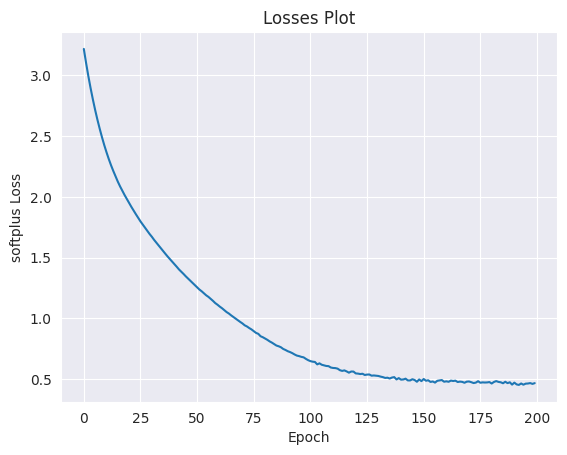

In [7]:
from pykeen.triples import TriplesFactory

# Assuming your dataframe has columns 'subject', 'predicate', 'object'
triples_factory = TriplesFactory.from_labeled_triples(
    triples=df[['subject', 'predicate', 'object']].values,
)

training, validation, testing = triples_factory.split(ratios=(.8, .1, .1))
d=training
id_to_entity={v: k for k, v in d.entity_to_id.items()}
id_to_relation={v: k for k, v in d.relation_to_id.items()}

from pykeen.pipeline import pipeline



result = pipeline(
#     model='TransE',
    loss="softplus",
    model="TransE",
    training=training,
    testing=testing,
    validation=validation,
    model_kwargs=dict(embedding_dim=20, random_seed=42),  # Increase the embedding dimension
    optimizer_kwargs=dict(lr=0.01),  # Adjust the learning rate
    training_kwargs=dict(num_epochs=200, use_tqdm_batch=False),  # Increase the number of epochs
)

# The trained model is stored in the pipeline result
model = result.model

#plot loss
result.plot_losses()

from pykeen.evaluation import RankBasedEvaluator
# The result object also contains the evaluation metrics result.metric_results.to_df()

# Create an evaluator
evaluator = RankBasedEvaluator()

# Evaluate the model
metrics = evaluator.evaluate(result.model, testing.mapped_triples, additional_filter_triples=[training.mapped_triples, validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")

(-1.0, 2.0)

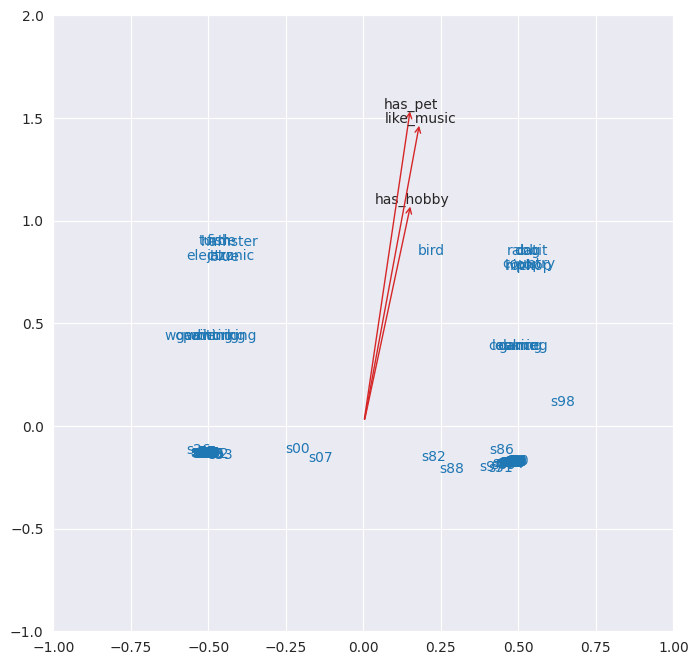

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.figure(figsize=(8, 8))
pca = PCA(n_components=2)
entity_embeddings = model.entity_representations[0](indices=None).detach().numpy()
m = pca.fit(entity_embeddings)

eu = m.transform(entity_embeddings)
# plt.plot(eu[:, 0], eu[:, 1],'.b')
for i, entity in enumerate(triples_factory.entity_id_to_label):
    plt.annotate(
        text=id_to_entity[entity],
        xy=(eu[i, 0], eu[i, 1]),
        color="tab:blue",
        ha="center", va="center"
    )

    
relation_embeddings = model.relation_representations[0](indices=None).detach().numpy()
ru = pca.transform(relation_embeddings)
for i, relation in enumerate(triples_factory.relation_id_to_label):
    plt.annotate(
        text=id_to_relation[relation],
        xy=(0,0), xytext=(ru[i, 0], ru[i, 1]),
        arrowprops=dict(
            arrowstyle="<-",
            color="tab:red",
            shrinkA=5,
            shrinkB=5,
            patchA=None,
            patchB=None,
            connectionstyle="arc3,rad=0."
        )
    )

plt.xlim([-1, 1])
plt.ylim([-1, 2])

In [9]:
training.triples

array([['s00', 'has_hobby', 'painting'],
       ['s00', 'has_pet', 'fish'],
       ['s00', 'like_music', 'electronic'],
       ['s01', 'has_hobby', 'gardening'],
       ['s01', 'has_pet', 'turtle'],
       ['s01', 'like_music', 'jazz'],
       ['s02', 'has_hobby', 'gardening'],
       ['s02', 'has_pet', 'hamster'],
       ['s03', 'has_hobby', 'writing'],
       ['s04', 'has_hobby', 'writing'],
       ['s05', 'has_hobby', 'painting'],
       ['s05', 'like_music', 'blue'],
       ['s06', 'has_hobby', 'writing'],
       ['s07', 'has_hobby', 'painting'],
       ['s07', 'has_pet', 'bird'],
       ['s08', 'has_hobby', 'woodworking'],
       ['s09', 'has_hobby', 'gardening'],
       ['s10', 'has_hobby', 'writing'],
       ['s11', 'has_hobby', 'writing'],
       ['s12', 'has_hobby', 'writing'],
       ['s13', 'has_hobby', 'writing'],
       ['s14', 'has_hobby', 'painting'],
       ['s15', 'has_hobby', 'painting'],
       ['s16', 'has_hobby', 'painting'],
       ['s17', 'has_hobby', 'gardening'

In [10]:
testing.triples

array([['s13', 'like_music', 'jazz'],
       ['s63', 'has_pet', 'dog'],
       ['s12', 'like_music', 'jazz'],
       ['s02', 'like_music', 'jazz'],
       ['s78', 'has_pet', 'rabbit'],
       ['s28', 'has_pet', 'fish'],
       ['s23', 'has_pet', 'turtle'],
       ['s61', 'has_pet', 'dog'],
       ['s90', 'has_pet', 'dog'],
       ['s38', 'like_music', 'jazz'],
       ['s49', 'has_pet', 'fish'],
       ['s77', 'has_pet', 'rabbit'],
       ['s45', 'like_music', 'jazz'],
       ['s36', 'has_pet', 'turtle'],
       ['s07', 'like_music', 'electronic'],
       ['s88', 'like_music', 'hiphop'],
       ['s25', 'has_pet', 'hamster'],
       ['s77', 'like_music', 'hiphop'],
       ['s73', 'like_music', 'hiphop'],
       ['s94', 'like_music', 'country'],
       ['s99', 'has_pet', 'rabbit'],
       ['s17', 'has_pet', 'fish'],
       ['s87', 'has_pet', 'dog'],
       ['s56', 'has_pet', 'rabbit'],
       ['s44', 'has_pet', 'turtle'],
       ['s03', 'like_music', 'jazz'],
       ['s37', 'like_music', 

In [11]:
from pykeen import predict
# Who do we predict brazil participates in inter-governmental organizations with?
predict.predict_target(
    model=model, head="s58", relation="has_pet", 
    triples_factory=triples_factory).add_membership_columns(training=training,testing=testing).df.head()

,tail_id,score,tail_label,in_training,in_testing
6,6,-0.060370,dog,False,False
17,17,-0.062482,rabbit,False,False
2,2,-0.074038,cat,False,False
0,0,-1.055358,bird,False,False
11,11,-3.065157,hamster,False,False


In [12]:
#to do https://github.com/pykeen/pykeen/blob/master/notebooks/hello_world/hello_world.ipynb
# Score all triples
# predict.predict_all(model=model).process(factory=result.training).add_membership_columns(**dataset.factory_dict).df